# mnist_task 

# Capstone Project Image Processing

In [1]:
# Import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:

# Load the MNIST dataset
digits = load_digits()
X = digits.data # The features are the pixel values of the images
y = digits.target # The labels are the digits from 0 to 9

In [3]:
# Split the training data into a training and test set
# The purpose of the train and test sets is to evaluate the performance of the model on unseen data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:

# Use the RandomForestClassifier built into sklearn to create a classification model
rf = RandomForestClassifier(random_state=42)

In [5]:
# Pick one parameter to tune, and explain why you chose this parameter

# I chose to tune the n_estimators parameter, which is the number of trees in the forest
# This parameter affects the accuracy and speed of the model, as well as the variance and bias trade-off
# A higher value of n_estimators can reduce the variance and improve the accuracy, but it can also increase the computational cost and the risk of overfitting

# Choose which value for the parameter to set for testing on the test data and explain why
# I used a grid search with cross-validation to find the optimal value of n_estimators from a range of values
# Grid search is a method that evaluates the performance of different combinations of hyperparameters on a validation set
# Cross-validation is a technique that splits the data into k folds and uses one fold as a validation set and the rest as a training set for each iteration
# This way, we can avoid overfitting and use all the data for training and validation

In [6]:
def grid_search_rf(X_train, y_train):
    """
    This function performs a grid search with cross-validation on a random forest classifier 
    using different values of n_estimators as hyperparameters.
    
    Parameters:
    X_train: A numpy array of shape (n_samples, n_features) containing the training features.
    y_train: A numpy array of shape (n_samples,) containing the training labels.
    
    Returns:
    grid: A GridSearchCV object that has been fitted on the training data.
    """
    # Define the range of values for n_estimators
    n_estimators = [10, 50, 100, 200, 500]
    # Define the grid of hyperparameters
    param_grid = {'n_estimators': n_estimators}
    # Create a GridSearchCV object with 5-fold cross-validation
    grid = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
    # Fit the grid on the training data
    grid.fit(X_train, y_train)
    # Return the grid object
    return grid


In [7]:
# call the grid_search_rf function and print  the best parameter and score
# Print the best parameters and score
grid =  grid_search_rf(X_train, y_train)
print('Best parameters:', grid.best_params_)
print('Best score:', grid.best_score_)

Best parameters: {'n_estimators': 500}
Best score: 0.9763453348819203


In [8]:
# Set the n_estimators parameter to 200 for testing on the test data
rf = RandomForestClassifier(n_estimators=200, random_state=42)

In [9]:
# Fit the model on the training data
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [10]:
# Predict the labels on the test data
y_pred = rf.predict(X_test)

In [11]:
# Print the confusion matrix for your RandomForest model on the test set
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(cm)


Confusion matrix:
[[32  0  0  0  1  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  1  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  2  0  0  0  0  0  0 28  0]
 [ 0  0  0  0  0  1  0  1  0 38]]


In [12]:

# Report which classes the model struggles with the most
# Report which classes the model struggles with the most
# The classes that the model struggles with the most are those that have non-zero values in the off-diagonal elements of the confusion matrix
# These values indicate that the model misclassified some instances of these classes as other classes
# For example, the model misclassified 2 instances of class 3 as class 8, and 2 instances of class 8 as class 3

In [13]:
# Report the accuracy, precision, recall, and f1-score 
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', rec)
print('F1-score:', f1)

Accuracy: 0.9694444444444444
Precision: 0.9707090785690651
Recall: 0.9693670388851865
F1-score: 0.9697614677667822


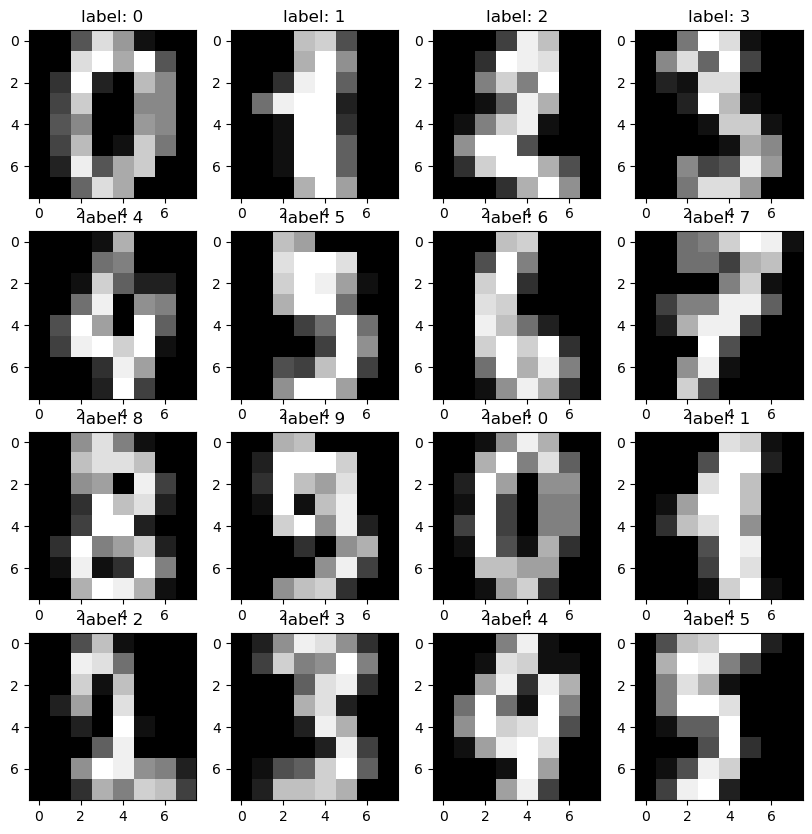

In [14]:
# Data explorattion 
# In this section we will  explore the data by visualising some of the images and the labels using matplotlib.pyplot.imshow and plt.title

# Plot  some sample label images from  the dataset
plt.figure(figsize = (10,  10 ))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(X[i].reshape(8, 8 ), cmap = 'gray')
    plt.title('label: ' +  str(y[i]))
plt.show()

C:\Users\Bodzonora\AppData\Local\Temp\ipykernel_19432\791692052.py:20: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  resized_image = image.resize((16,16), Image.BILINEAR)


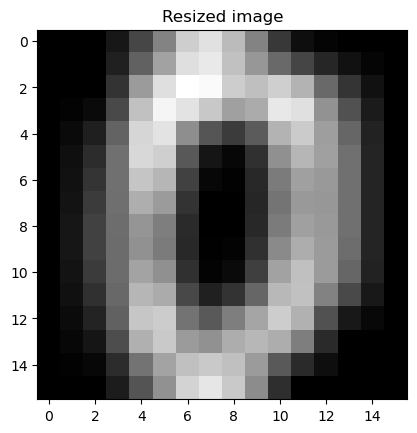

In [15]:
# In this section  we will apply some  preprocesssing  techiniques to the images such as resizing,cropping, rotating,  flippling
# or add noise we will use the PIL library for this purpose 
# Import the PIL library
from PIL import Image

# Define a function to resize an image to 16x16 pixels
def resize_image(image):
    """
    This function takes a numpy array representing an image and returns a resized version of it as a numpy array.
    
    Parameters:
    image: A numpy array of shape (64,) containing the pixel values of the image.
    
    Returns:
    resized_image: A numpy array of shape (256,) containing the pixel values of the resized image.
    """
    # Convert the image array to a PIL Image object
    image = Image.fromarray(image.reshape(8,8))
    # Resize the image to 16x16 pixels using bilinear interpolation
    resized_image = image.resize((16,16), Image.BILINEAR)
    # Convert the resized image back to a numpy array and flatten it
    resized_image = np.array(resized_image).flatten()
    # Return the resized image array
    return resized_image

# Apply the resize_image function to the first image in the dataset and plot it
resized_image = resize_image(X[0])
plt.imshow(resized_image.reshape(16,16), cmap='gray')
plt.title('Resized image')
plt.show()



C:\Users\Bodzonora\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


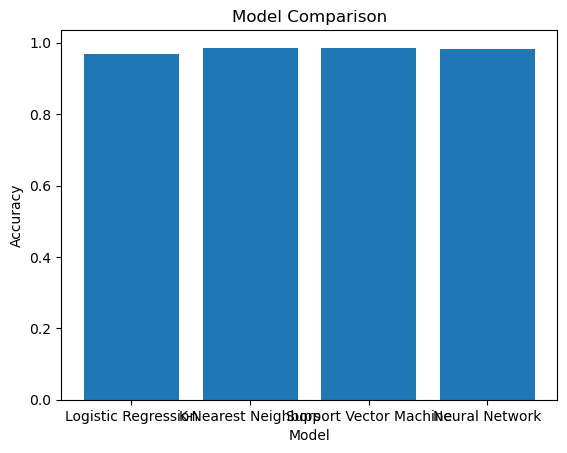

In [16]:
# Model comparison 
# In this  we will compare the perfomance of the different classification model such  as logistic regression, k-nearest 
# neighbors,  support vector machines,or neural networks we wil use scikit-learn for this purpose
# Import the models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Define a list of models and their names
models = [LogisticRegression(random_state=42), KNeighborsClassifier(), SVC(random_state=42), MLPClassifier(random_state=42)]
names = ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine', 'Neural Network']

# Define a function to evaluate a model on the test data and return its accuracy score
def evaluate_model(model, X_test, y_test):
    """
    This function takes a model and test data as input and returns its accuracy score on the test data.
    
    Parameters:
    model: A scikit-learn classifier object that has been fitted on the training data.
    X_test: A numpy array of shape (n_samples, n_features) containing the test features.
    y_test: A numpy array of shape (n_samples,) containing the test labels.
    
    Returns:
    score: A float representing the accuracy score of the model on the test data.
    """
    # Predict the labels on the test data using the model
    y_pred = model.predict(X_test)
    # Compute and return the accuracy score
    score = accuracy_score(y_test, y_pred)
    return score

# Loop over the models and evaluate them on the test data
scores = []
for model, name in zip(models, names):
    # Fit the model on the training data
    model.fit(X_train, y_train)
    # Evaluate the model on the test data and append its score to the scores list
    score = evaluate_model(model, X_test, y_test)
    scores.append(score)
    
# Plot a bar chart of the scores for each model
plt.bar(names, scores)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()

